## Practica 3: Data Visualization

Genera gráficos y visualizaciones, diagramas circulares, histogramas, diagramas de caja, gráficos y diagramas de dispersión. Genera tantos como puedas utilizando bucles «for», al menos 5 diagramas diferentes.

### Lectura del CSV

In [ ]:
import os
import pandas as pd

df = pd.read_csv("datos_limpios.csv")

df['Datetime'] = pd.to_datetime(df['Datetime'])

Vemos las columnas y el tipo de datos que tenemos para ver que se puede visualizar con graficos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93000 entries, 0 to 92999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Booking ID       93000 non-null  object        
 1   Booking Status   93000 non-null  object        
 2   Customer ID      93000 non-null  object        
 3   Vehicle Type     93000 non-null  object        
 4   Pickup Location  93000 non-null  object        
 5   Drop Location    93000 non-null  object        
 6   Avg VTAT         93000 non-null  float64       
 7   Avg CTAT         93000 non-null  float64       
 8   Booking Value    93000 non-null  float64       
 9   Ride Distance    93000 non-null  float64       
 10  Driver Ratings   93000 non-null  float64       
 11  Customer Rating  93000 non-null  float64       
 12  Payment Method   93000 non-null  object        
 13  Datetime         93000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), obje

### Histogramas

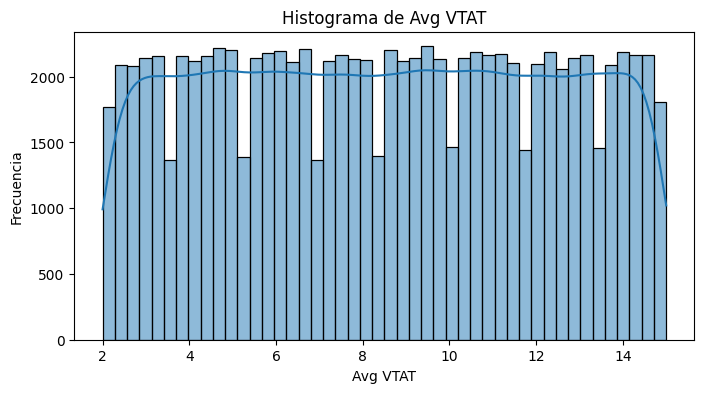

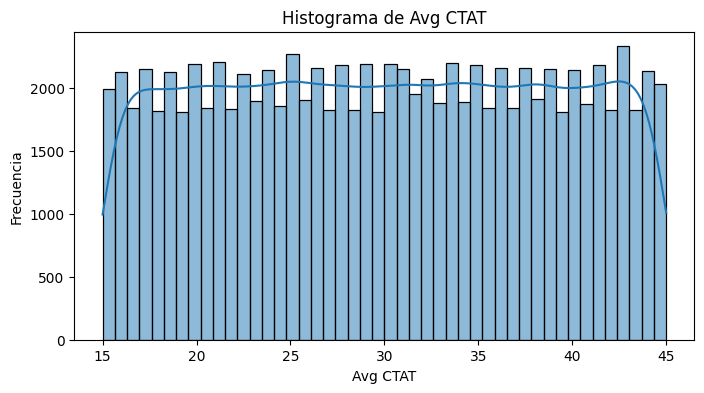

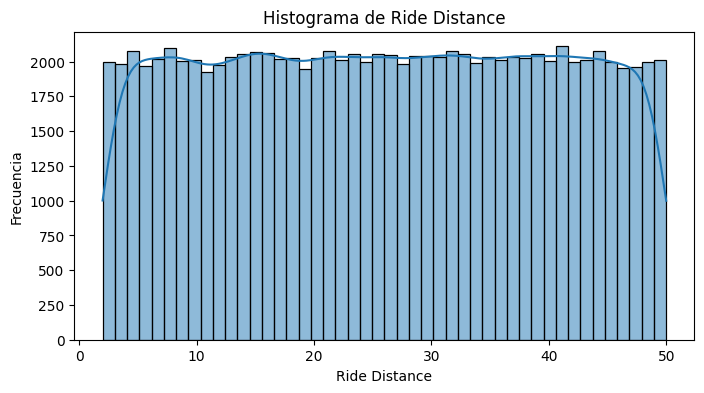

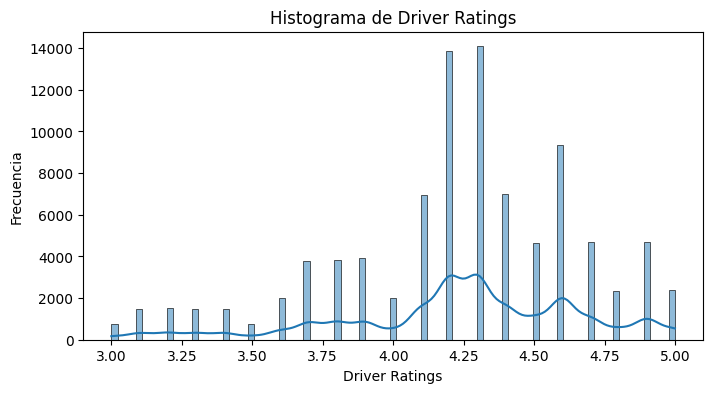

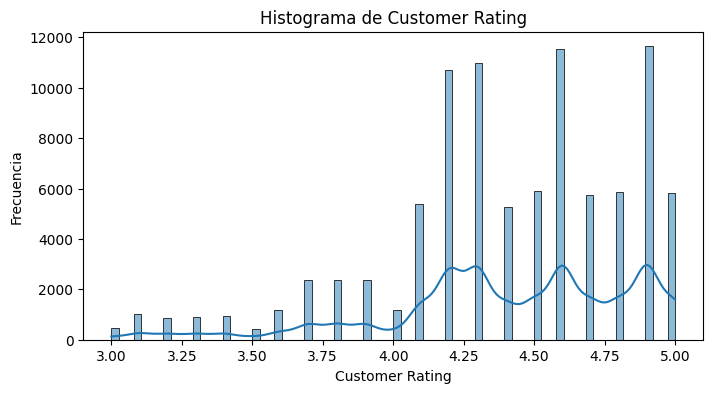

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

col_num = ['Avg VTAT', 'Avg CTAT', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
for col in col_num:
  plt.figure(figsize=(8,4))
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

### Diagrama de caja

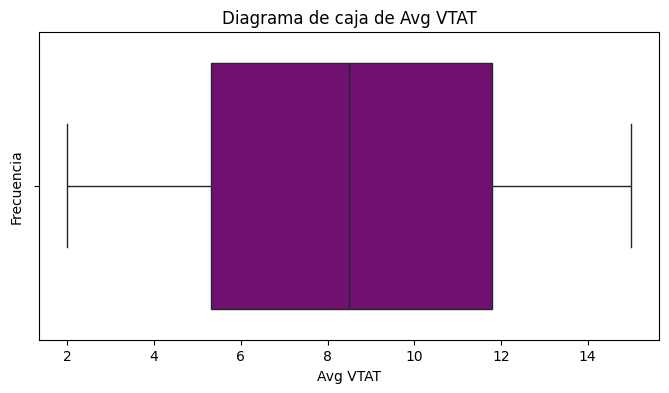

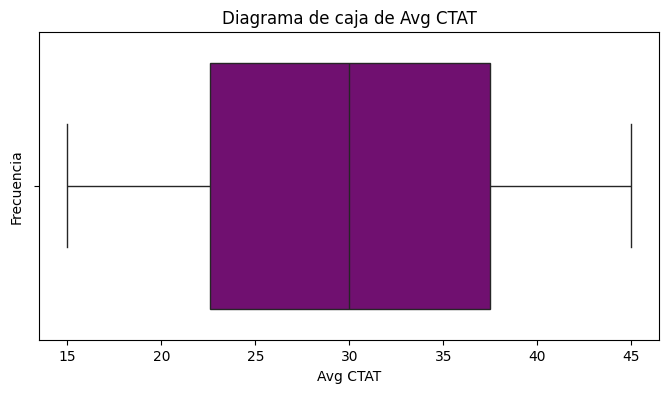

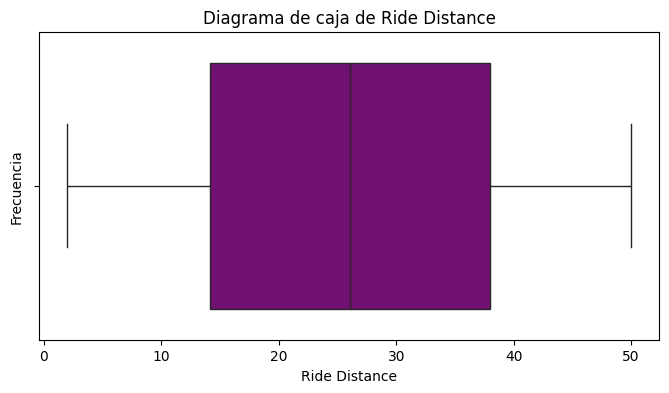

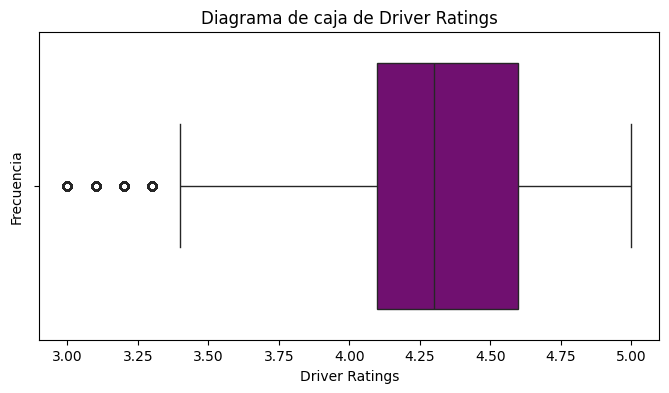

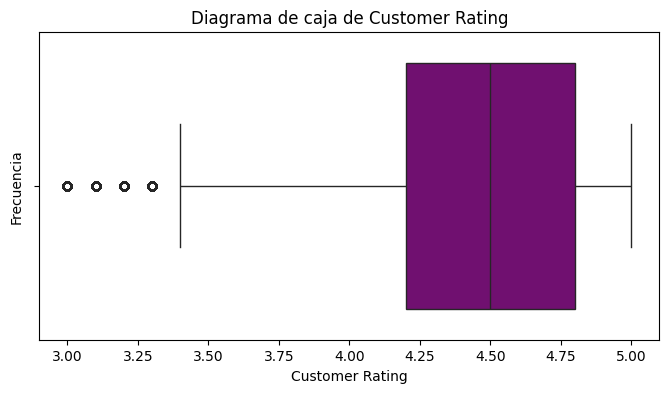

In [ ]:
for col in col_num:
  plt.figure(figsize=(8,4))
  sns.boxplot(data=df, x=col, color="purple")
  plt.title(f'Diagrama de caja de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')

En este caso, podemos hacer una comparación de Driver Ratings con Customer Rating para saber si en ambos se dan calificaciones similares o uno de los dos califica de manera diferente.

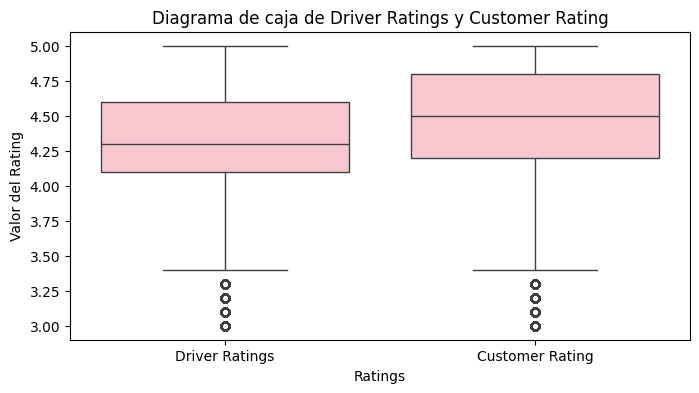

In [ ]:
ratings = df[['Driver Ratings', 'Customer Rating']]
plt.figure(figsize=(8,4))
sns.boxplot(data=ratings, color="pink")
plt.title("Diagrama de caja de Driver Ratings y Customer Rating")
plt.xlabel('Ratings')
plt.ylabel('Valor del Rating')
plt.show()

### Heatmap

Con el heatmap se podrá visualizar si hay correlaciones.

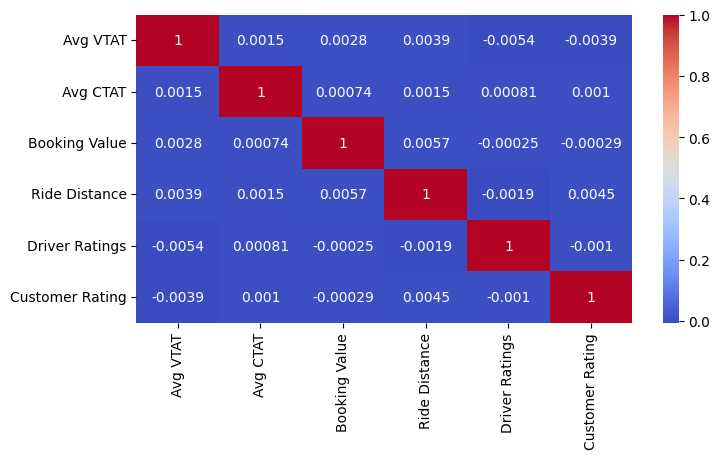

In [ ]:
df_num = df.select_dtypes(include='float64')
corr = df_num.corr()

plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Según el heatmap, no hay correlación lineal fuerte entre las variables D:


### Grafico de dispersión

Aunque no haya encontrado correlación alguna, de igual manera se harán greaficos de dispersión, de lo que yo creía que estaría relacionado.

El costo total con la distancia del viaje  (Booking Value vs Ride Distance)

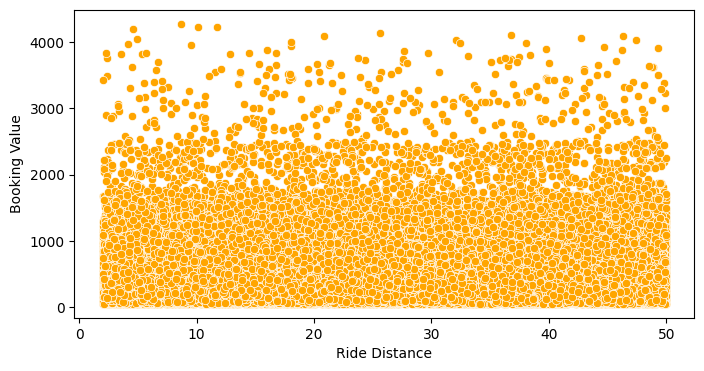

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Ride Distance', y='Booking Value', color='orange')
plt.xlabel('Ride Distance')
plt.ylabel('Booking Value')
plt.show()

La calificación al conductor con el tiempo de espera promedio para que llegue (Driver Ratings vs Avg VTAT)

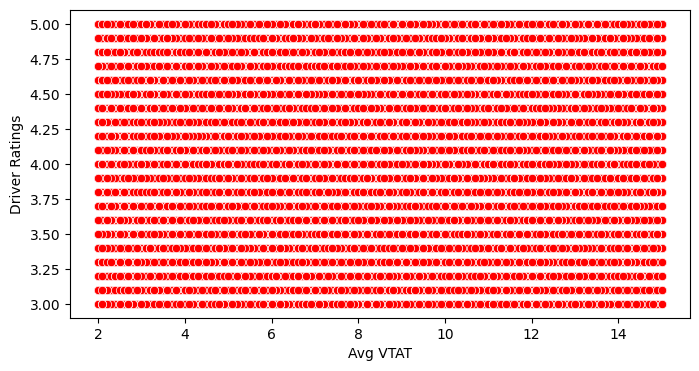

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Avg VTAT', y='Driver Ratings', color='red')
plt.xlabel('Avg VTAT')
plt.ylabel('Driver Ratings')
plt.show()


La calificación dada del cliente con el tiempo promedio del viaje (Customer Rating vs Avg CTAT)

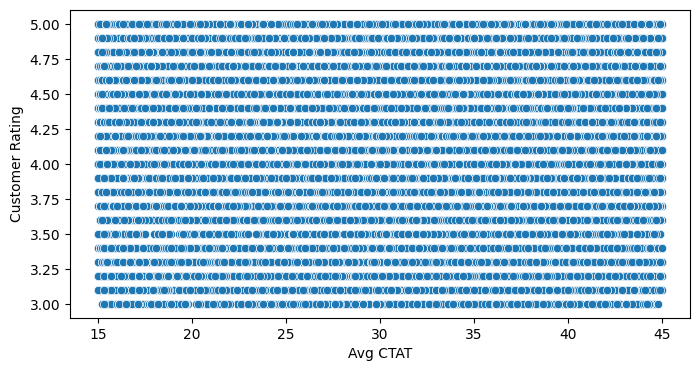

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Avg CTAT', y='Customer Rating')
plt.xlabel('Avg CTAT')
plt.ylabel('Customer Rating')
plt.show()

La calificación del cliente con el costo del viaje (Customer Rating vs Booking Value)

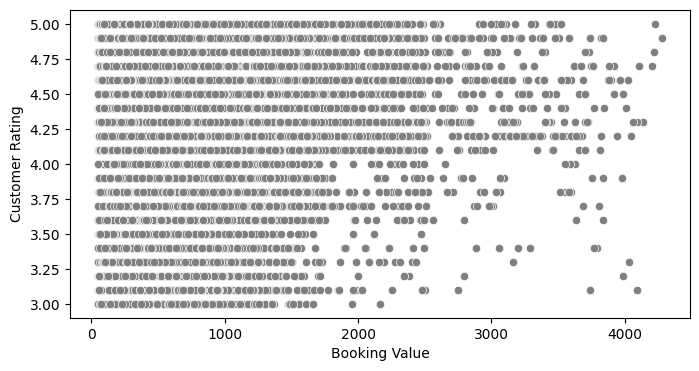

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Booking Value', y='Customer Rating', color='grey')
plt.xlabel('Booking Value')
plt.ylabel('Customer Rating')
plt.show()

### Diagrama circular

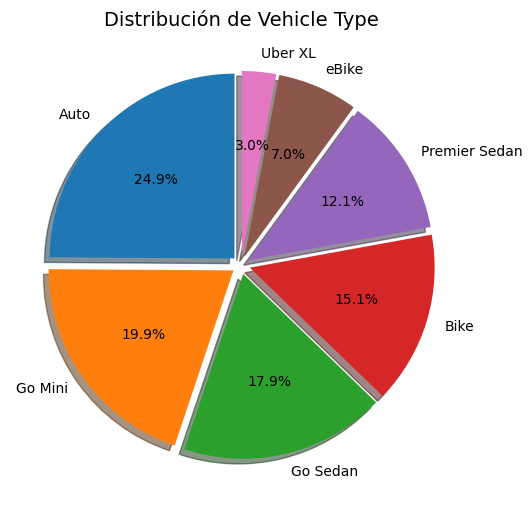

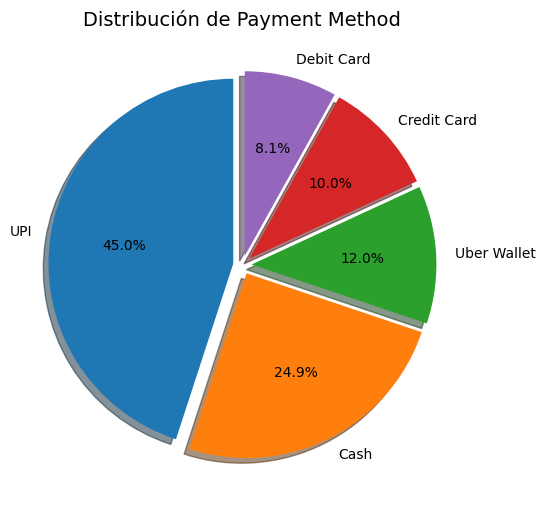

In [ ]:
cols = ['Vehicle Type', 'Payment Method']

for col in cols:
    plt.figure(figsize=(6,6))
    df[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        explode=[0.05]*df[col].nunique()
    )
    plt.title(f"Distribución de {col}", fontsize=14)
    plt.ylabel('')
    plt.show()

### Grafico de lineas

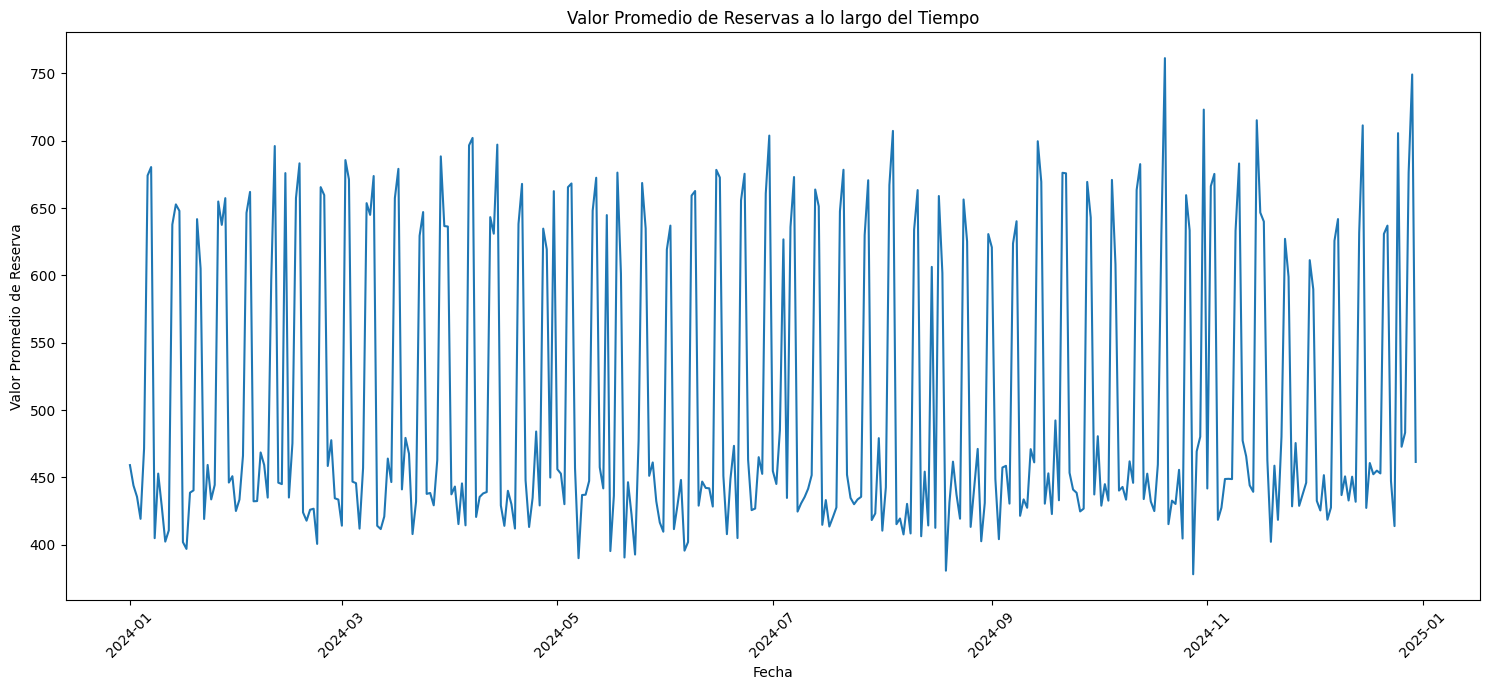

In [ ]:
df_diario = df.set_index('Datetime').resample('D')['Booking Value'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(data=df_diario, x='Datetime', y='Booking Value')
plt.title('Valor Promedio de Reservas a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio de Reserva')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()